In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
pip install -q keras

In [34]:
import keras

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Upload and explore each DataSets**


In [36]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cab_Data.csv') 
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/City.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer_ID.csv')
df3= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Transaction_ID.csv')

In [99]:
df.shape


(359392, 7)

In [98]:
df1.shape

(20, 3)

In [97]:

df2.shape


(49171, 4)

In [96]:
df3.shape

(440098, 3)

**Merge all the datasets**

In [41]:
data0 = pd.merge(df , df1 , on='City')
data1 = pd.merge(df2,df3, on='Customer ID')
data3 = pd.merge(data0,data1,on='Transaction ID')

**Adding some changes on the final dataset**

In [42]:
data3['Profit'] =data3['Cost of Trip']+data3['Price Charged']
data3.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Profit
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885.0,24701.0,29290,Male,28,10813,Card,684.585
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885.0,24701.0,27703,Male,27,9237,Card,693.374
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885.0,24701.0,28712,Male,53,11242,Cash,222.832
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885.0,24701.0,28020,Male,23,23327,Cash,729.002
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885.0,24701.0,27182,Male,33,8536,Card,212.396


Split the Date Of Travel

In [43]:
data3['Date of Travel'] = pd.to_datetime(data3['Date of Travel'])
data3['Date of Travel']

0        2016-01-08
1        2016-01-06
2        2016-01-02
3        2016-01-07
4        2016-01-03
            ...    
359387   2018-01-08
359388   2018-01-04
359389   2018-01-05
359390   2018-01-05
359391   2018-01-02
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]

In [44]:
data3['Date of Travel'].dt.year

0         2016
1         2016
2         2016
3         2016
4         2016
          ... 
359387    2018
359388    2018
359389    2018
359390    2018
359391    2018
Name: Date of Travel, Length: 359392, dtype: int64

In [45]:
data3['year'] = data3['Date of Travel'].dt.year
data3['month']=data3['Date of Travel'].dt.month
data3['day']=data3['Date of Travel'].dt.day
data3

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Profit,year,month,day
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885.0,24701.0,29290,Male,28,10813,Card,684.5850,2016,1,8
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885.0,24701.0,27703,Male,27,9237,Card,693.3740,2016,1,6
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885.0,24701.0,28712,Male,53,11242,Cash,222.8320,2016,1,2
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885.0,24701.0,28020,Male,23,23327,Cash,729.0020,2016,1,7
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885.0,24701.0,27182,Male,33,8536,Card,212.3960,2016,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,418859.0,127001.0,52392,Male,24,15651,Cash,132.6000,2018,1,8
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,418859.0,127001.0,53286,Male,32,6528,Cash,220.5980,2018,1,4
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,418859.0,127001.0,52265,Male,56,7966,Cash,786.7200,2018,1,5
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,418859.0,127001.0,52175,Male,32,6423,Card,260.2380,2018,1,5


Dropping the duplicates on Customer ID column

In [46]:
data3['Customer ID'].duplicated().sum()

313244

In [47]:
data3.drop_duplicates(['Customer ID'], inplace=True)
data3

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Profit,year,month,day
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885.0,24701.0,29290,Male,28,10813,Card,684.5850,2016,1,8
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885.0,24701.0,27703,Male,27,9237,Card,693.3740,2016,1,6
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885.0,24701.0,28712,Male,53,11242,Cash,222.8320,2016,1,2
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885.0,24701.0,28020,Male,23,23327,Cash,729.0020,2016,1,7
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885.0,24701.0,27182,Male,33,8536,Card,212.3960,2016,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336093,10197277,2017-07-23,Pink Cab,WASHINGTON DC,32.64,375.27,368.8320,418859.0,127001.0,51510,Female,18,6855,Card,744.1020,2017,7,23
336284,10199158,2017-07-21,Yellow Cab,WASHINGTON DC,2.02,26.13,24.9672,418859.0,127001.0,52759,Female,58,2615,Card,51.0972,2017,7,21
336392,10201973,2017-07-31,Yellow Cab,WASHINGTON DC,17.25,225.16,215.2800,418859.0,127001.0,51078,Male,21,8810,Card,440.4400,2017,7,31
343083,10274704,2017-12-06,Yellow Cab,WASHINGTON DC,42.80,627.21,559.8240,418859.0,127001.0,52614,Female,44,8303,Card,1187.0340,2017,12,6


Change 'Age' and 'KM Travelled columns from continuous number to categrical

In [67]:
data3['Age'].min()

18

In [66]:
data3['Age'].max()

65

In [65]:
data3['Catogrical Age'] = pd.cut(data3.Age , bins=[18,25,35,45,55,65], labels=['18-25','26-35','36-45','46-55','above 55'])
data3.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Profit,year,month,day,Catogrical Age,Categrocial KM Travelled
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885.0,24701.0,29290,Male,28,10813,Card,684.585,2016,1,8,26-35,31-40 KM
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885.0,24701.0,27703,Male,27,9237,Card,693.374,2016,1,6,26-35,21-30 KM
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885.0,24701.0,28712,Male,53,11242,Cash,222.832,2016,1,2,46-55,0-10 KM
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885.0,24701.0,28020,Male,23,23327,Cash,729.002,2016,1,7,18-25,31-40 KM
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885.0,24701.0,27182,Male,33,8536,Card,212.396,2016,1,3,26-35,0-10 KM


In [49]:
data3['KM Travelled'].max()

48.0

In [50]:
data3['KM Travelled'].min()

1.9

In [51]:
data3['Categrocial KM Travelled'] = pd.cut(data3['KM Travelled'], bins=[0,10,20,30,40,50],labels=['0-10 KM','11-20 KM','21-30 KM','31-40 KM','More tha 40 KM'])

Checking for Null Values

In [63]:
data3.isnull().sum()

Transaction ID                 0
Date of Travel                 0
Company                        0
City                           0
KM Travelled                   0
Price Charged                  0
Cost of Trip                   0
Population                     0
Users                          0
Customer ID                    0
Gender                         0
Age                            0
Income (USD/Month)             0
Payment_Mode                   0
Profit                         0
year                           0
month                          0
day                            0
Catogrical Age              3915
Categrocial KM Travelled       0
dtype: int64

Finally checking tha data type

In [52]:
data3.dtypes

Transaction ID                       int64
Date of Travel              datetime64[ns]
Company                             object
City                                object
KM Travelled                       float64
Price Charged                      float64
Cost of Trip                       float64
Population                         float64
Users                              float64
Customer ID                          int64
Gender                              object
Age                                  int64
Income (USD/Month)                   int64
Payment_Mode                        object
Profit                             float64
year                                 int64
month                                int64
day                                  int64
Catogrical Age                    category
Categrocial KM Travelled          category
dtype: object

In [53]:
data3.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Age,Income (USD/Month),Profit,year,month,day
count,4.614800e+04,46148.000000,46148.000000,46148.000000,4.614800e+04,46148.000000,46148.000000,46148.000000,46148.000000,46148.000000,46148.000000,46148.00000,46148.000000
mean,1.011302e+07,22.523476,404.327190,281.455841,1.396052e+06,67818.872801,27413.942641,35.358499,14997.863764,685.783031,2016.435187,5.98793,15.481863
std,1.156542e+05,12.257976,262.273602,156.619476,1.899894e+06,80190.164915,17842.855037,12.605460,7999.204793,406.315550,0.682811,3.56278,8.771495
min,1.000001e+07,1.900000,15.600000,19.190000,2.489680e+05,3643.000000,1.000000,18.000000,2000.000000,36.984000,2016.000000,1.00000,1.000000
25%,1.002062e+07,11.880000,195.527500,147.537000,6.314420e+05,12994.000000,11837.750000,25.000000,8289.750000,347.668800,2016.000000,3.00000,8.000000
50%,1.006761e+07,22.440000,369.005000,277.296000,9.429080e+05,25063.000000,26002.500000,33.000000,14625.500000,656.167800,2016.000000,6.00000,15.000000
75%,1.018023e+07,32.960000,562.922500,406.393200,1.339155e+06,127001.000000,39952.500000,42.000000,21022.000000,972.162400,2017.000000,9.00000,23.000000
max,1.043985e+07,48.000000,1993.830000,691.200000,8.405837e+06,302149.000000,60000.000000,65.000000,35000.000000,2629.958000,2018.000000,12.00000,31.000000


**Visualize Data**

1. **How does the profit of each company changed through the years?** 


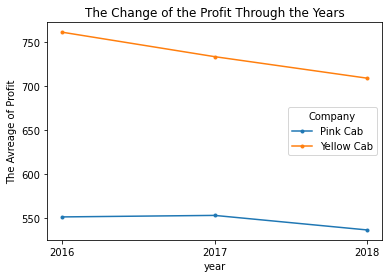

In [72]:
data31=pd.pivot_table(data3,index='year',columns='Company' ,values='Profit' )
data31.plot(marker='.')
plt.xticks([2016,2017,2018])
plt.ylabel('The Avreage of Profit')
plt.title('The Change of the Profit Through the Years')
plt.show()

It is shown in the previous plot that the difference between the profit of the yellow cab and pink cab is huge.

Also both companies faced a loss in profit after 2017.

**2. Is there a difference of number of customers for each company based on gender?**

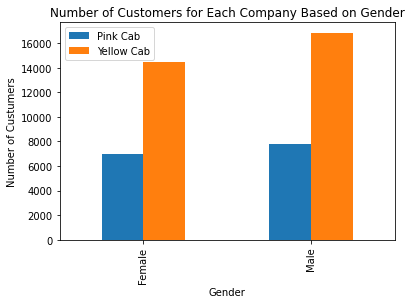

In [74]:

data31=pd.pivot_table(data3,index='Gender',columns='Company' ,values='Customer ID',aggfunc='count')
data31.plot(kind='bar')
plt.legend(loc='best')
plt.ylabel('Number of Custumers')
plt.title('Number of Customers for Each Company Based on Gender')
plt.show()

As it is shown in the previous bar graph that there is no huge difference between the numbers of female and male customers for each company. 

However, the yellow cab have much more customers than the pink cab.

**3. Is there a difference of the number of customers for each company based on age?**

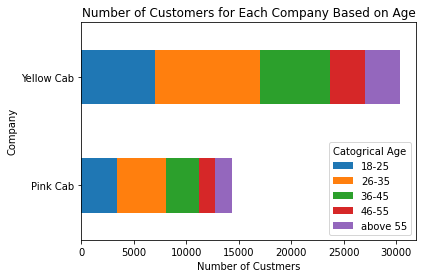

In [76]:
data33=pd.pivot_table(data3,index='Company',columns='Catogrical Age' ,values='Customer ID' , aggfunc='count')

data33.plot(kind='barh', stacked=True) 
plt.xlabel('Number of Custmers')
plt.title('Number of Customers for Each Company Based on Age')
plt.show()

From the previous bar graph, it is shown that the category between 26-35 has the most number of customers in both companies.

But again, the Yellow cab has the most number of customers.

**4. Which one of the companies have more reach to customers in different cities?**

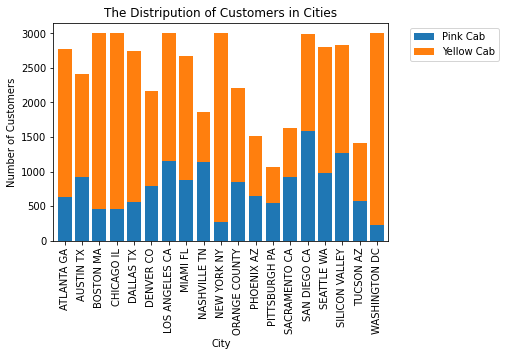

In [81]:
data33=pd.pivot_table(data3,index='City',columns='Company' ,values='Customer ID' , aggfunc='count')
data33.plot(kind='bar', stacked=True , width=0.8 )
plt.legend(bbox_to_anchor=(1.05,1))
plt.ylabel('Number of Customers')
plt.title('The Distripution of Customers in Cities')
plt.show()

It is shown from previous bar chart that in general the yellow cab have more reach of customers.

Although, it is shown that the pink cab has the highest reach of customers in some cities such as Nashville, San diego and Pittsburgh. 

And the lowest reach in Washington and New york.

**5. Does the KM Travelled Affected the Profit for Each Company?**

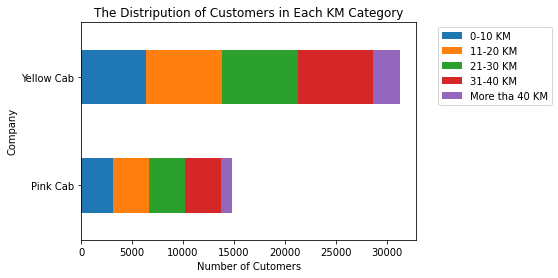

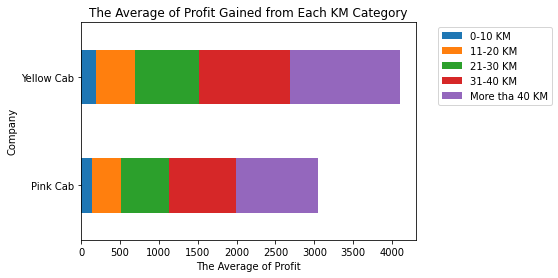

In [95]:
data33=pd.pivot_table(data3,index='Company',columns='Categrocial KM Travelled' ,values='Customer ID' , aggfunc='count')
data33.plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1.05,1))
plt.xlabel('Number of Cutomers')
plt.title('The Distripution of Customers in Each KM Category')

data33=pd.pivot_table(data3,index='Company',columns='Categrocial KM Travelled' ,values='Profit' , aggfunc='mean')
data33.plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1.05,1))
plt.xlabel('The Average of Profit')
plt.title('The Average of Profit Gained from Each KM Category')

plt.show()

As it is shown in the previous bar chart even though the numbers of customers that travelled more than 40 KM is the least but the profit gained from these trips was the highest in both companies.

**To summarize :**


*  In the profit comparison troughout the years the yellow cab had the highest profit in all years.

*   The yellow cab had the highest numbers of customers based on gender, age and their distripution in US cities.

**Our Recommendation :** the best investment for your company is going to be the yellow cab

